Task 1
**Linear Regression**(House pricing DataSet)

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ml docs /kc_house_data_NaN.csv')
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
(sampleNum,featureNum)=data.shape

print('Number of samples',sampleNum)
print('Number of features',featureNum-1)

Number of samples 21613
Number of features 21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

<Axes: >

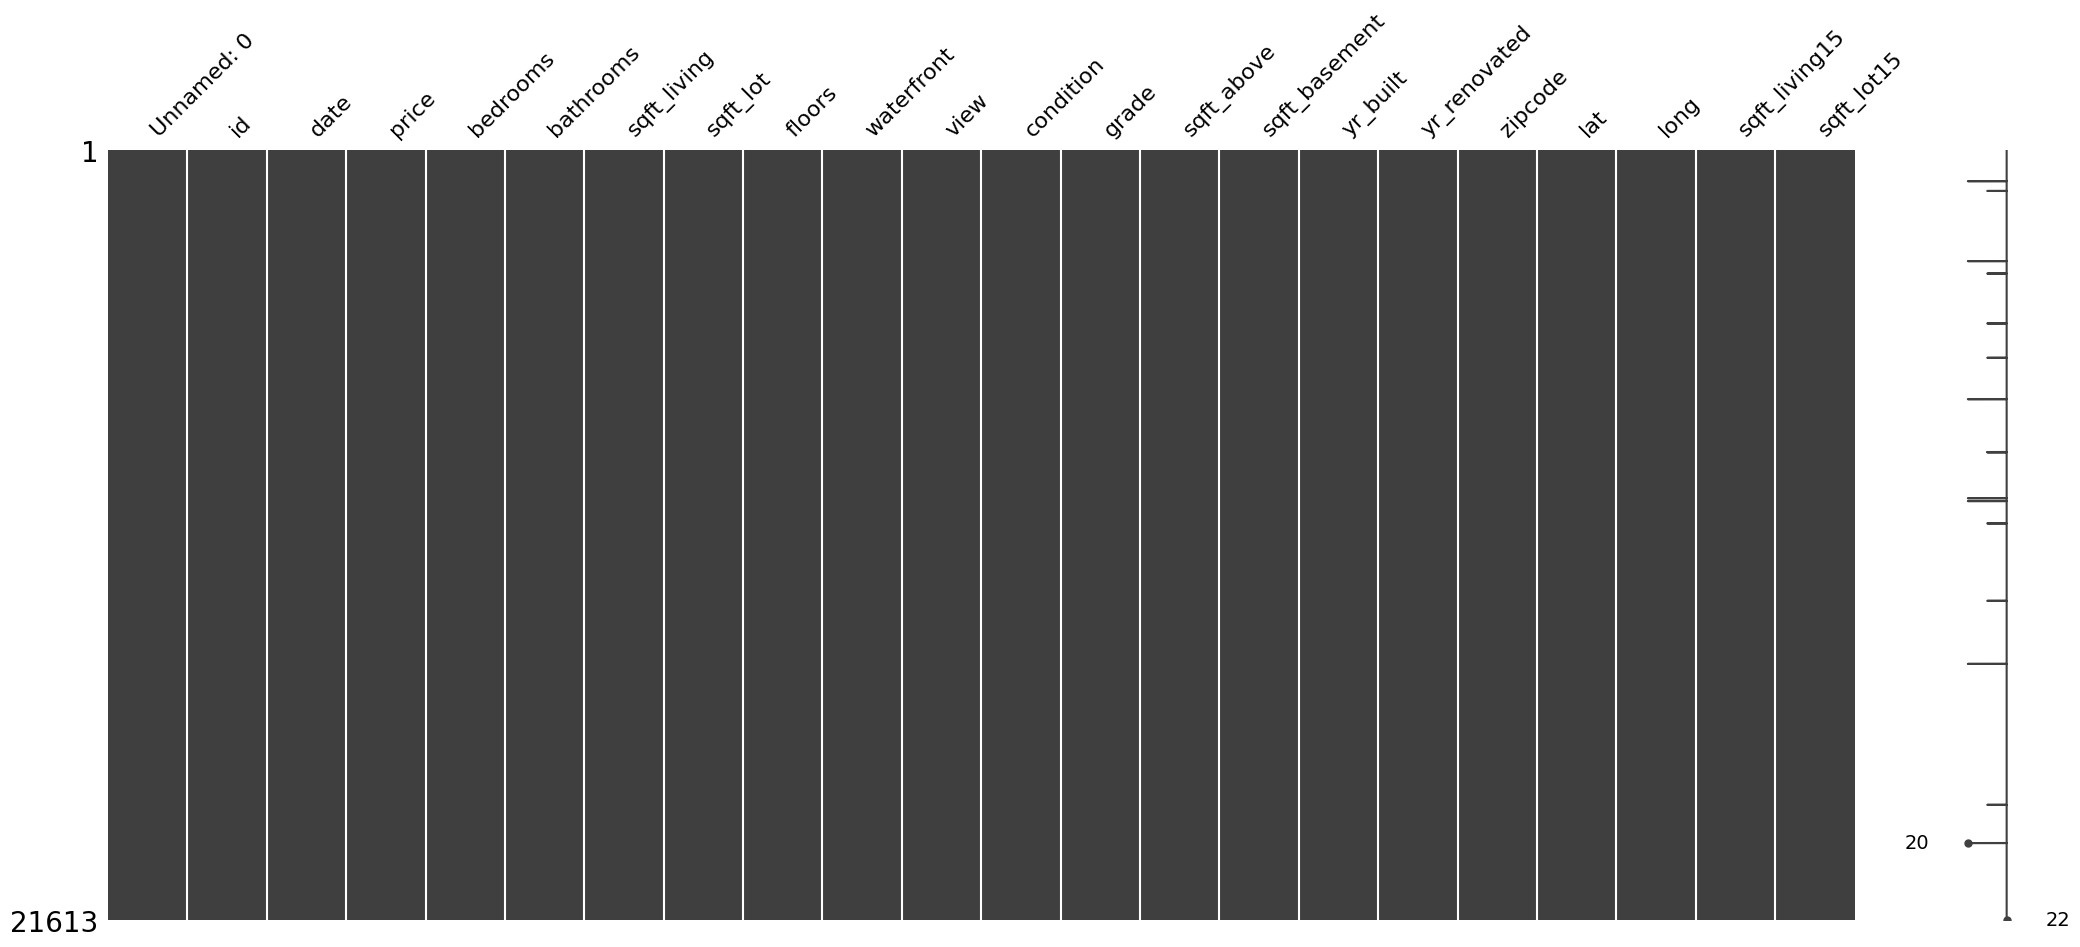

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

In [ ]:
data.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
mode = dataset['bedrooms'].mode()
data['bedrooms'].fillna(mode[0], inplace =True)
mode1 = dataset['bathrooms'].mode()
data['bathrooms'].fillna(mode1[0], inplace =True)


In [ ]:
data.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
import numpy as np
xdata=np.array(xdata).reshape((-1,1))
xdata.shape
print(xdata)

[[1955]
 [1951]
 [1933]
 ...
 [2009]
 [2004]
 [2008]]


In [ ]:
ydata

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.20,random_state=1)

In [ ]:
print("size of training samples",xtrain.shape)
print("size of test samples",xtest.shape)
print("size of training labels",ytrain.shape)
print("size of test labels",ytest.shape)

size of training samples (17290, 1)
size of test samples (4323, 1)
size of training labels (17290,)
size of test labels (4323,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.ma.core import nonzero
linear=LinearRegression()
linear.fit(xtrain,ytrain)
print("intercept is",linear.intercept_,"coef is",linear.coef_)

intercept is -808214.8941724668 coef is [682.979958]


In [ ]:
ypred=linear.predict(xtest)
print("predicted value",ypred)

predicted value [557745.0218229  548183.30241093 561159.92161289 ... 546134.36253694
 542036.48278895 546817.34249494]


In [ ]:
rsquare=linear.score(xtest,ytest)
print("r square value",rsquare)

r square value 0.001334799698434308


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,ypred)
rmse=mean_squared_error(ytest,ypred,squared=False)
print("mse=",mse)
print("rmse",rmse)
print("r_Squared=",rsquare)

mse= 172370583344.17865
rmse 415175.36456800834
r_Squared= 0.001334799698434308
